In [1]:
import numpy as np
import seaborn as sns
import gc

In [2]:
init_state = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
])

In [3]:
class Game:
    def __init__(self, state):
        self.state = state
        self.empty = self.make_empty(state)
        self.first_player = FIRST
        
    def make_empty(self, state):
        emp = []
        for i in range(3):
            for j in range(3):
                if state[i][j] == 0:
                    emp.append(3*i + j)
        
        return emp
    
    def is_lose(self, a):
        opp = 2 - (a-1)
        
        for i in range(3):
            if self.state[i][0] == self.state[i][1] == self.state[i][2] == opp:
                return 1
            elif self.state[0][i] == self.state[1][i] == self.state[2][i] == opp:
                return 1
        if self.state[0][0] == self.state[1][1] == self.state[2][2] == opp:
            return 1
        return 0
    
    def is_win(self, a):       
        for i in range(3):
            if self.state[i][0] == self.state[i][1] == self.state[i][2] == a:
                return 1
            elif self.state[0][i] == self.state[1][i] == self.state[2][i] == a:
                return 1
        if self.state[0][0] == self.state[1][1] == self.state[2][2] == a:
            return 1
        if self.state[0][2] == self.state[1][1] == self.state[2][0] == a:
            return 1
        return 0
    
    def is_draw(self, a):
        if self.is_win(a):
            return 0
        if np.all(self.state):
            return 1
        else:
            return 0
        
    def is_done(self):
        if self.is_win(1) or self.is_win(2) or self.is_draw(a):
            return 1
        else:
            return 0
        
        
    def update(self, target):
        state = self.state.copy()
        x, y = target//3, target%3
        a = self.next_opp()
        state[x][y] = a
        return Game(state)
    
    
    def next_opp(self):
        a = b = 0
        for i in range(len(self.state)):
            for j in range(len(self.state)):
                if self.state[i][j] == self.first_player:
                    a += 1
                elif self.state[i][j] != 0:
                    b += 1
                    
        if a == b:
            return self.first_player
        else:
            return 2 + min(0, 1-self.first_player)

In [4]:
# def mcs(game):
#     n = 10
#     values = [0] * len(game.empty)
    
#     for i, a in enumerate(game.empty):
#         for _ in range(n):
#             values[i] += -playout(game.update())
    

In [5]:
class Random:
    def __init__(self, status):
        self.status = status
        
        
    def action(self, game):
        return np.random.choice(game.empty)

In [6]:
class MCS:
    def __init__(self, status, n):
        self.status = status
        self.n = n
    
    def playout(self, game):
        if game.is_lose(self.status):
            return -1
        
        if game.is_draw(self.status):
            return 0
        
        
        if game.is_win(self.status):
            return 1
        
        return self.playout(game.update(np.random.choice(game.empty)))
    
    
    def action(self, game):
        values = [0] * len(game.empty)

        for i, a in enumerate(game.empty):
            for _ in range(self.n):
                g = game.update(a)
                values[i] += self.playout(g)
                
        return game.empty[np.argmax(values)]


In [7]:
gc.collect()

80

In [8]:
def play(game, m1, m2):
    global score
    while 1:
        a1 = m1.action(game)
        game = game.update(a1)
        if game.is_win(m1.status):
#             print(m1.status, 'wins')
#             print(game.state)
            score[m1.status-1] += 1
            return 
        elif game.is_draw(m1.status):
#             print('draw')
#             print(game.state)
            score[2] += 1
            return 

        a2 = m2.action(game)
        game = game.update(a2)
        if game.is_win(m2.status):
#             print(m2.status, 'wins')
#             print(game.state)
            score[m2.status-1] += 1
            return 
        elif game.is_draw(m2.status):
#             print('draw')
#             print(game.state)
            score[2] += 1
            return 


In [9]:
FIRST = 1
game = Game(init_state)
m1 = Random(1)
m2 = MCS(2, 20)

In [10]:
%%time
score = [0, 0, 0]
for _ in range(1000):
    play(game, m1, m2)
    
score1 = score.copy()

FIRST = 2
game = Game(init_state)
for _ in range(1000):
    play(game, m2, m1)

Wall time: 3min 49s


In [11]:
score

[90, 1814, 96]

In [12]:
score1

[82, 841, 77]

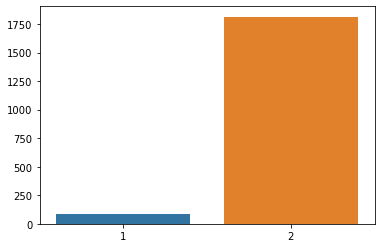

In [13]:
sns.barplot(x = [1, 2], y = score[:2])

In [15]:
# v1: 710 vs 1208
# v2: 113 vs 1771 // 113 vs 814
# v3: 95 vs 1801 // 89 vs 829
## 이정도면 완성형
